<a href="https://colab.research.google.com/github/MatheusNakai/Projeto_Ciencia_de_Dados/blob/main/IMDB_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introudução
Este projeto de Análise Exploratória de Dados (EDA) tem como objetivo investigar os impactos dos conflitos armados na indústria cinematográfica. Serão explorados diferentes aspectos, como produção de filmes, influências nas temáticas abordadas, recepção do público e mudanças nas narrativas. A análise será realizada utilizando técnicas de EDA e visualização de dados.

# Dados
Os dados utilizados neste projeto serão obtidos do Banco Internacional de Filmes (IMDB), como bases de dados públicas. A coleta e organização dos dados serão realizadas de forma a permitir a análise adequada das relações entre os conflitos armados e os filmes produzidos.

In [ ]:
# Exibir tempo de execução
!pip install ipython-autotime
!pip install scipy

%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 9.25 s (started: 2023-06-06 10:59:53 +00:00)


In [ ]:
# Import das bibliotecas
import pandas as pd
import numpy as np
import matplotlib as plt
from time import sleep

time: 802 ms (started: 2023-06-06 10:55:27 +00:00)


# Importação dos Dados


In [ ]:
# Carregamento dos datasets
IMDB_MAIN_URL = "https://datasets.imdbws.com"


time: 501 µs (started: 2023-06-06 10:55:28 +00:00)


In [ ]:
# Load akas database

import random
p = 0.5 # Get 50% of dataset, pois se pegar tudo o colab não aguenta
akas = pd.read_csv(f"{IMDB_MAIN_URL}/title.akas.tsv.gz", sep='\t',
                   skiprows=lambda i: i>0 and random.random() > p)

print(f"Size: {akas.memory_usage(index=True).sum()/(1024**2)} MB")
print(f"Size: {akas.titleId.count()} rows")

#akas.head()

<ipython-input-5-1b807a7b415d>:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  akas = pd.read_csv(f"{IMDB_MAIN_URL}/title.akas.tsv.gz", sep='\t',


Size: 1102.4411010742188 MB
Size: 18062393 rows
time: 1min 7s (started: 2023-06-06 10:55:28 +00:00)


In [ ]:
# Load basics database

basics = pd.read_csv(f"{IMDB_MAIN_URL}/title.basics.tsv.gz", sep='\t',low_memory=False)
basics['titleId'] = basics['tconst'] 

print(f"Size: {basics.memory_usage(index=True).sum()/(1024**2)} MB")
print(f"Size: {basics.titleId.count()} rows")
#basics.head()

Size: 755.7819061279297 MB
Size: 9906183 rows
time: 45.6 s (started: 2023-06-06 10:56:36 +00:00)


In [ ]:
# Load Ratings database

ratings = pd.read_csv(f"{IMDB_MAIN_URL}/title.ratings.tsv.gz", sep='\t',low_memory=False)
ratings['titleId'] = ratings['tconst']

print(f"Size: {ratings.memory_usage(index=True).sum()/(1024**2)} MB")
print(f"Size: {ratings.titleId.count()} rows")
#ratings.head()


Size: 40.24835205078125 MB
Size: 1318854 rows
time: 1.32 s (started: 2023-06-06 10:57:21 +00:00)


# União dos dataframes

In [ ]:
df = pd.merge(akas, ratings, how="inner", on='titleId')
del akas
del ratings
df = pd.merge(df, basics, how="inner", on='titleId')
del basics
import gc
gc.collect()

0

time: 33.8 s (started: 2023-06-06 10:57:23 +00:00)


In [ ]:
print(f"Size: {df.memory_usage(index=True).sum()/(1024**2)} MB")
print(f"Size: {df.titleId.count()} rows")
df['startYear_date'] = pd.to_datetime(df['startYear'], errors='coerce', format="%Y")

df.head()


Size: 348.93914794921875 MB
Size: 2177912 rows


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst_x,averageRating,...,tconst_y,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,startYear_date
0,tt0000001,2,Carmencita,DE,\N,\N,literal title,0,tt0000001,5.7,...,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",1894-01-01
1,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,tt0000001,5.7,...,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",1894-01-01
2,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0,tt0000001,5.7,...,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",1894-01-01
3,tt0000001,7,Carmencita,\N,\N,original,\N,1,tt0000001,5.7,...,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",1894-01-01
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1,tt0000002,5.8,...,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",1892-01-01


time: 350 ms (started: 2023-06-06 10:57:56 +00:00)


#Média de Avaliações

Text(0.5, 1.0, 'averageRating')

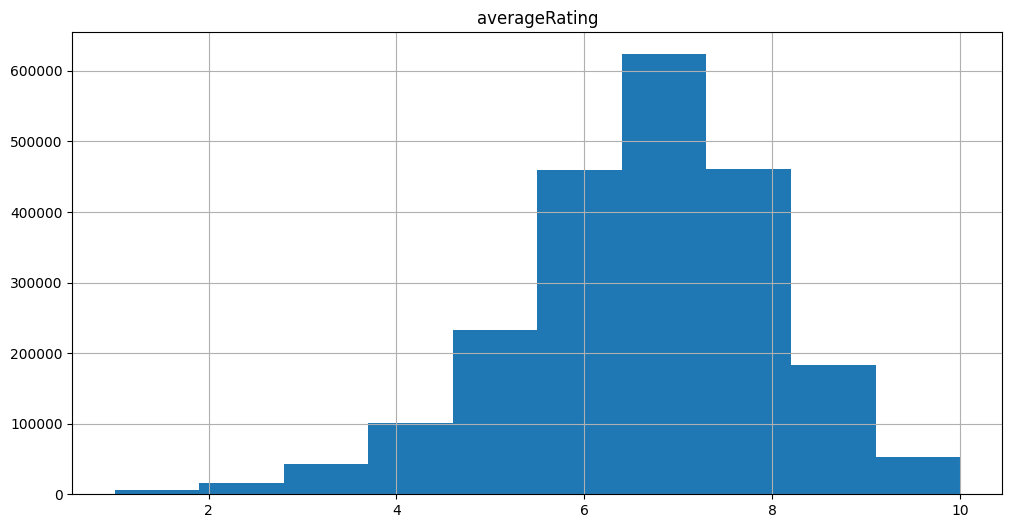

time: 402 ms (started: 2023-06-06 10:57:57 +00:00)


In [ ]:
# Ratings

fig, axs = plt.pyplot.subplots(1,1,figsize=(12,6))

# averageRating
df.averageRating.hist(ax=axs)
axs.set_title('averageRating')



#Número de Produções por País e por Ano

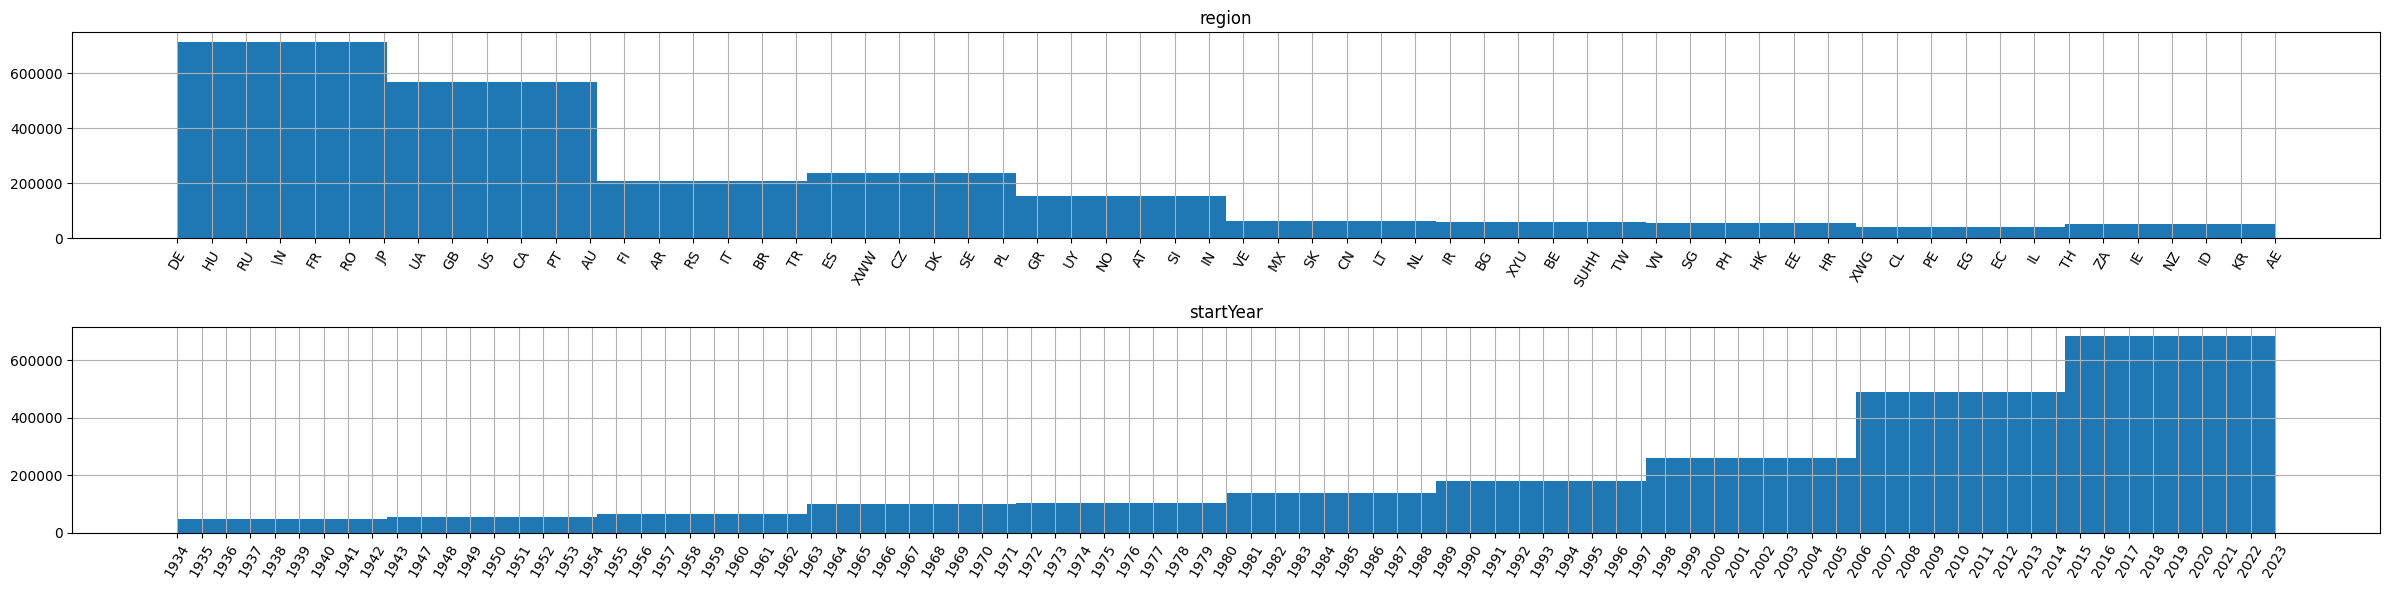

time: 8.45 s (started: 2023-06-06 10:57:57 +00:00)


In [ ]:

fig, axs = plt.pyplot.subplots(2,1,figsize=(24,6))



# get regions with more than 30% of mean records
countries = df.region.value_counts() > df.region.value_counts().mean() * 0.3
countries = countries[countries].index.values

# region
df.region[df.region.isin(countries)].hist(ax=axs[0], xrot=60)
axs[0].set_title('region')



# get year with more than 30% of mean records
years = df.startYear.value_counts() > df.startYear.value_counts().mean() * 0.3
years = years[years].index.values

# startYear
a = df.sort_values(by='startYear').startYear[df.startYear.isin(years)].hist(ax=axs[1], xrot=60)
axs[1].set_title('startYear')


fig.tight_layout()

O primeiro primeiro gráfico demonstra o número de produções por região demonstrando que países europeus, norte americanos e Japão são os que predominam em número de produções.
<p>
O segundo gráfico demonstra que nos últimos anos, principalmente de 1997 até 2023 o número houve um significativo aumento.

# Recorte do dataframe para as últimas 3 décadas

In [ ]:
# separando o dataframe para apenas os filmes apartir de 1990
ten = df.loc[(df['startYear']>'1990') & (df['titleType']=='movie')]

ten = ten.assign(genres=df['genres'].str.split(',')).explode('genres')

#ten.head(10)

time: 9.11 s (started: 2023-06-06 10:58:06 +00:00)


## Analises possiveis:

- Olhar o numero de producoes de generos por ano para ver impacto de eventos históricos grandes (11/09, pandemia, guerra com ucrania, ChatGPT)


- Observer diversificacao de paises, generos (plotar a quuantidade de producoes por ano) - talvez unir países tipo EUA x países asíaticos + india x europa


- Procurar bases diferentes - entender se o maior investimento por genero reflete no maior consumo


- Relacionar o crescimento de filmes com indicadores de crescimento de cada país (enda, pib ou escolaridade)

- Relacionar algo com premiacoes

- tem sites com fotografias das bases com o tempo - talvez tenha ratings por ano e a gnt consiga explorar a nota por ano

- Entender os impactos das plataformas de streaming



#Número de Produções por Gênero ao longo das últimas três décadas

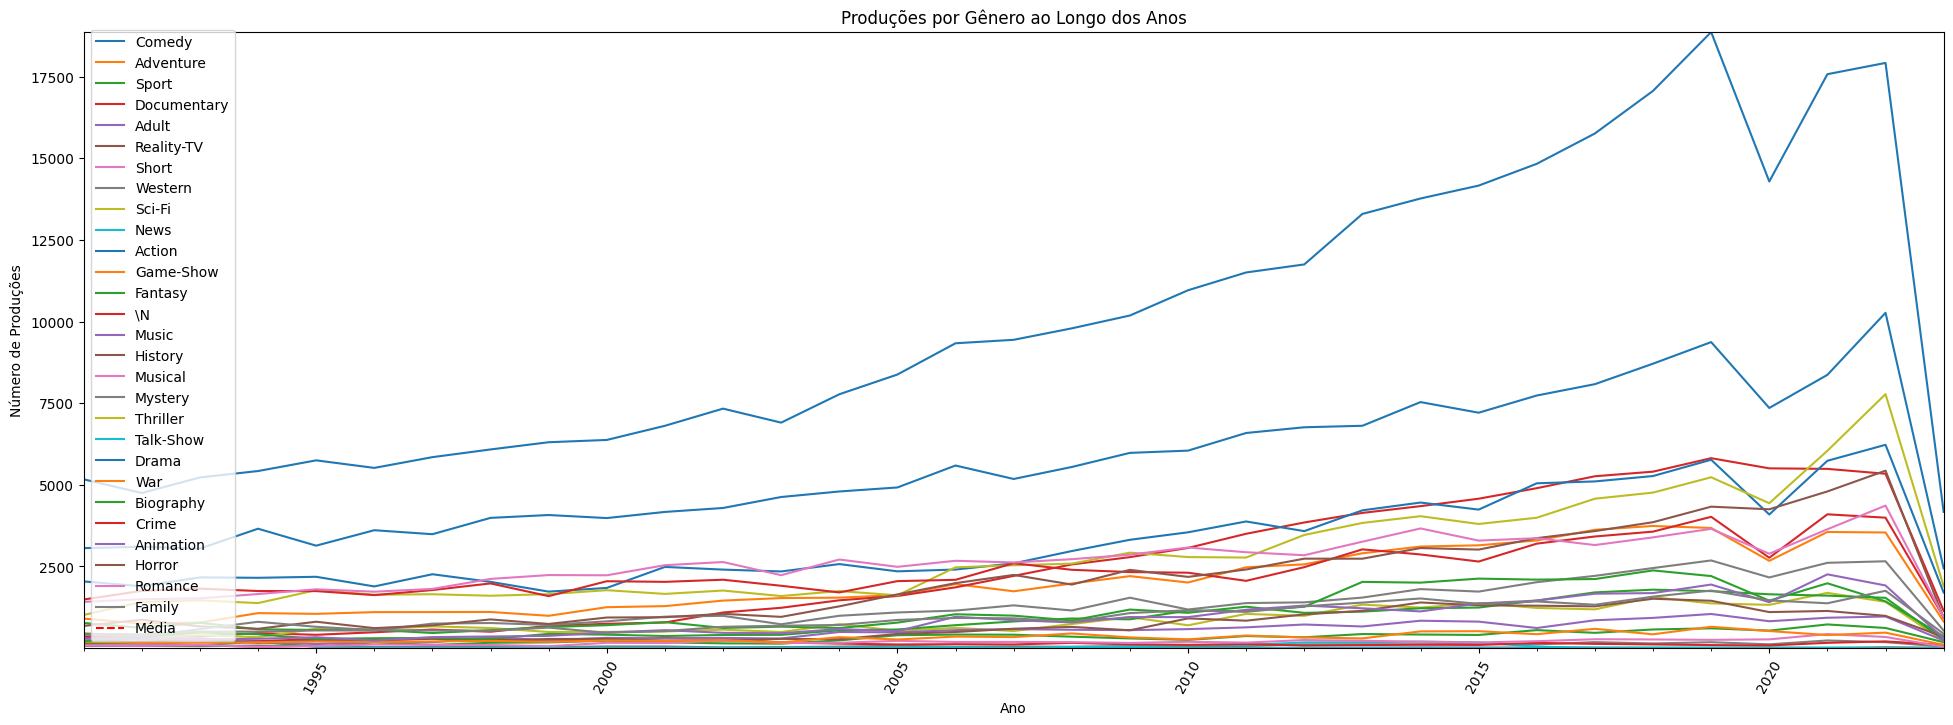

time: 18 s (started: 2023-06-06 10:58:15 +00:00)


In [ ]:
import datetime
# Olhar o numero de producoes de generos por ano para ver impacto de eventos históricos grandes (11/09, pandemia, guerra com ucrania, ChatGPT)
import math

# Extrair os gêneros únicos
unique_genres = set(ten['genres'].str.split(',').explode())

# Criar uma figura vazia
fig, ax = plt.pyplot.subplots(figsize=(24,8))

# Para cada gênero, criar uma linha separada no gráfico
ymin = math.inf
ymax = 0
for genre in unique_genres:
    genre_df = ten[ten['genres'] == genre]
    genre_df.groupby('startYear_date').size().plot(ax=ax, label=genre)
    genre_df.groupby('startYear_date').size()
    ymin = ten[ten['genres'] == genre].groupby(by='startYear_date')['titleId'].count().min() if ten[ten['genres'] == genre].groupby(by='startYear_date')['titleId'].count().min() < ymin else ymin
    ymax = ten[ten['genres'] == genre].groupby(by='startYear_date')['titleId'].count().max() if ten[ten['genres'] == genre].groupby(by='startYear_date')['titleId'].count().max() > ymax else ymax

# Linha para numero de producoes por ano
mean_df = ten.groupby('startYear_date').size().mean()
ax.plot(mean_df, label="Média", color='red', linestyle='--')

# Configurar os rótulos do gráfico
ax.set_xlabel('Ano')
ax.set_ylabel('Número de Produções')
ax.set_title('Produções por Gênero ao Longo dos Anos')
plt.pyplot.xticks(rotation=60)
ax.set_ylim([ymin, ymax])

# Exibir o gráfico
ax.legend()
# plt.pyplot.tight_layout()
plt.pyplot.show()


##Análises do Gráfico
Uma análise dos dados revela uma tendência geral de aumento no número de produções cinematográficas em quase todos os gêneros desde 1997. Esse crescimento contínuo demonstra o dinamismo e a expansão da indústria cinematográfica ao longo das últimas décadas.

Em particular, o ano de 2019 foi marcado por um pico no número de produções em quase todos os gêneros. Esse aumento significativo pode ser atribuído a diversos fatores, como avanços tecnológicos na produção de filmes, maior acesso a financiamento e distribuição, além do interesse crescente do público por uma variedade de gêneros cinematográficos.

No entanto, a indústria cinematográfica enfrentou um desafio sem precedentes no ano seguinte, em 2020, com a eclosão da pandemia global de COVID-19. A disseminação do vírus resultou em medidas de restrição, fechamento de cinemas e interrupção das produções cinematográficas em todo o mundo. Essa situação teve um impacto significativo na indústria, resultando em uma queda acentuada no número de produções em todos os gêneros.

A pandemia afetou toda a cadeia de produção cinematográfica, desde o adiamento e cancelamento de lançamentos até a paralisação de filmagens e produções em andamento. As restrições de distanciamento social e o medo de frequentar cinemas resultaram em uma redução drástica no público e nas receitas de bilheteria.

Apesar desse declínio temporário, espera-se que a indústria cinematográfica se recupere gradualmente à medida que as restrições forem amenizadas e a confiança do público for restaurada. A demanda por entretenimento audiovisual permanece alta, e o setor está se adaptando, buscando soluções criativas, como lançamentos digitais e plataformas de streaming, para alcançar o público durante esses tempos desafiadores.

#Número de avaliações de Cada Gênero ao longo das três últimas Décadas



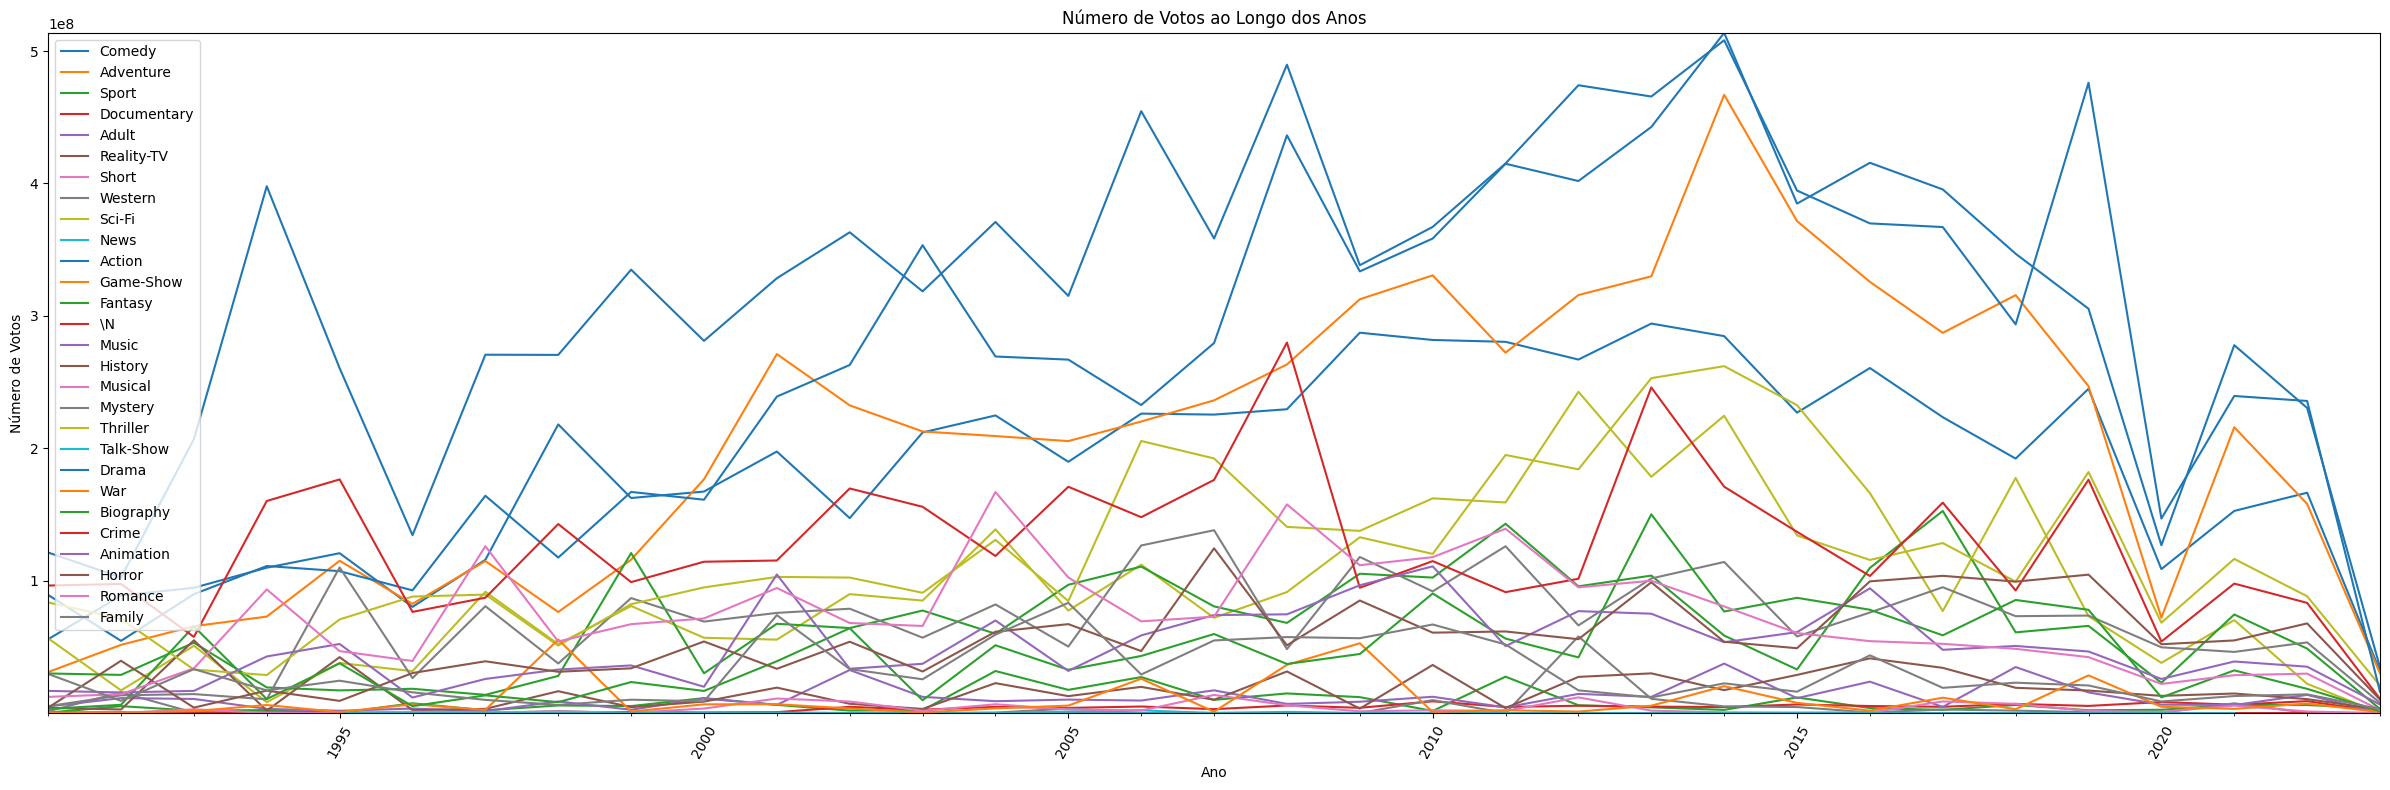

time: 18.3 s (started: 2023-06-06 10:58:33 +00:00)


In [ ]:

# Extrair os gêneros únicos
unique_genres = set(ten['genres'].str.split(',').explode())
# Criar uma figura vazia
fig, ax = plt.pyplot.subplots(figsize=(24,8))

# Para cada gênero, criar uma linha separada no gráfico
ymin = math.inf
ymax = 0
for genre in unique_genres:
    genre_df = ten[ten['genres'] == genre]
    genre_df.groupby('startYear_date')['numVotes'].sum().plot(ax=ax, label=genre)
    genre_df.groupby('startYear_date').size()
    ymin = ten[ten['genres'] == genre].groupby('startYear_date')['numVotes'].sum().min() if ten[ten['genres'] == genre].groupby('startYear_date')['numVotes'].sum().min() < ymin else ymin
    ymax = ten[ten['genres'] == genre].groupby('startYear_date')['numVotes'].sum().max() if ten[ten['genres'] == genre].groupby('startYear_date')['numVotes'].sum().max() > ymax else ymax

# Configurar os rótulos do gráfico
ax.set_xlabel('Ano')
ax.set_ylabel('Número de Votos')
ax.set_title('Número de Votos ao Longo dos Anos')
plt.pyplot.xticks(rotation=60)
ax.set_ylim([ymin, ymax])

ax.legend()

# Exibir o gráfico
plt.pyplot.tight_layout()
plt.pyplot.show()


##**Analise do Gráfico**
No ano de 2020, a indústria cinematográfica enfrentou um desafio sem precedentes devido à pandemia global de COVID-19. Essa crise sanitária teve um impacto significativo no número de votos em filmes de praticamente todos os gêneros, resultando em uma queda acentuada no engajamento do público.

A pandemia levou ao fechamento temporário de cinemas em muitas partes do mundo, além de impor restrições e medidas de distanciamento social que limitaram as opções de entretenimento fora de casa. Como resultado, o acesso ao cinema foi severamente reduzido, e muitas pessoas optaram por adiar ou limitar suas idas ao cinema, priorizando a segurança e o bem-estar.

Além disso, o adiamento ou cancelamento de lançamentos de filmes planejados para 2020 também teve um impacto direto no número de votos. Com as produções interrompidas e a incerteza em torno das datas de lançamento, houve uma diminuição na disponibilidade de novos títulos para o público assistir e avaliar.

A mudança de comportamento das pessoas durante a pandemia também desempenhou um papel significativo na queda dos números de votos. Com o aumento do tempo passado em casa, houve uma diversificação nas opções de entretenimento, como o consumo de conteúdo em plataformas de streaming e serviços de vídeo sob demanda. Isso pode ter levado a uma dispersão da atenção do público, resultando em uma diminuição nos votos e no engajamento com filmes específicos.



#Número de avaliações dos Filmes com Gênero de Guerra ao longo das três últimas Décadas

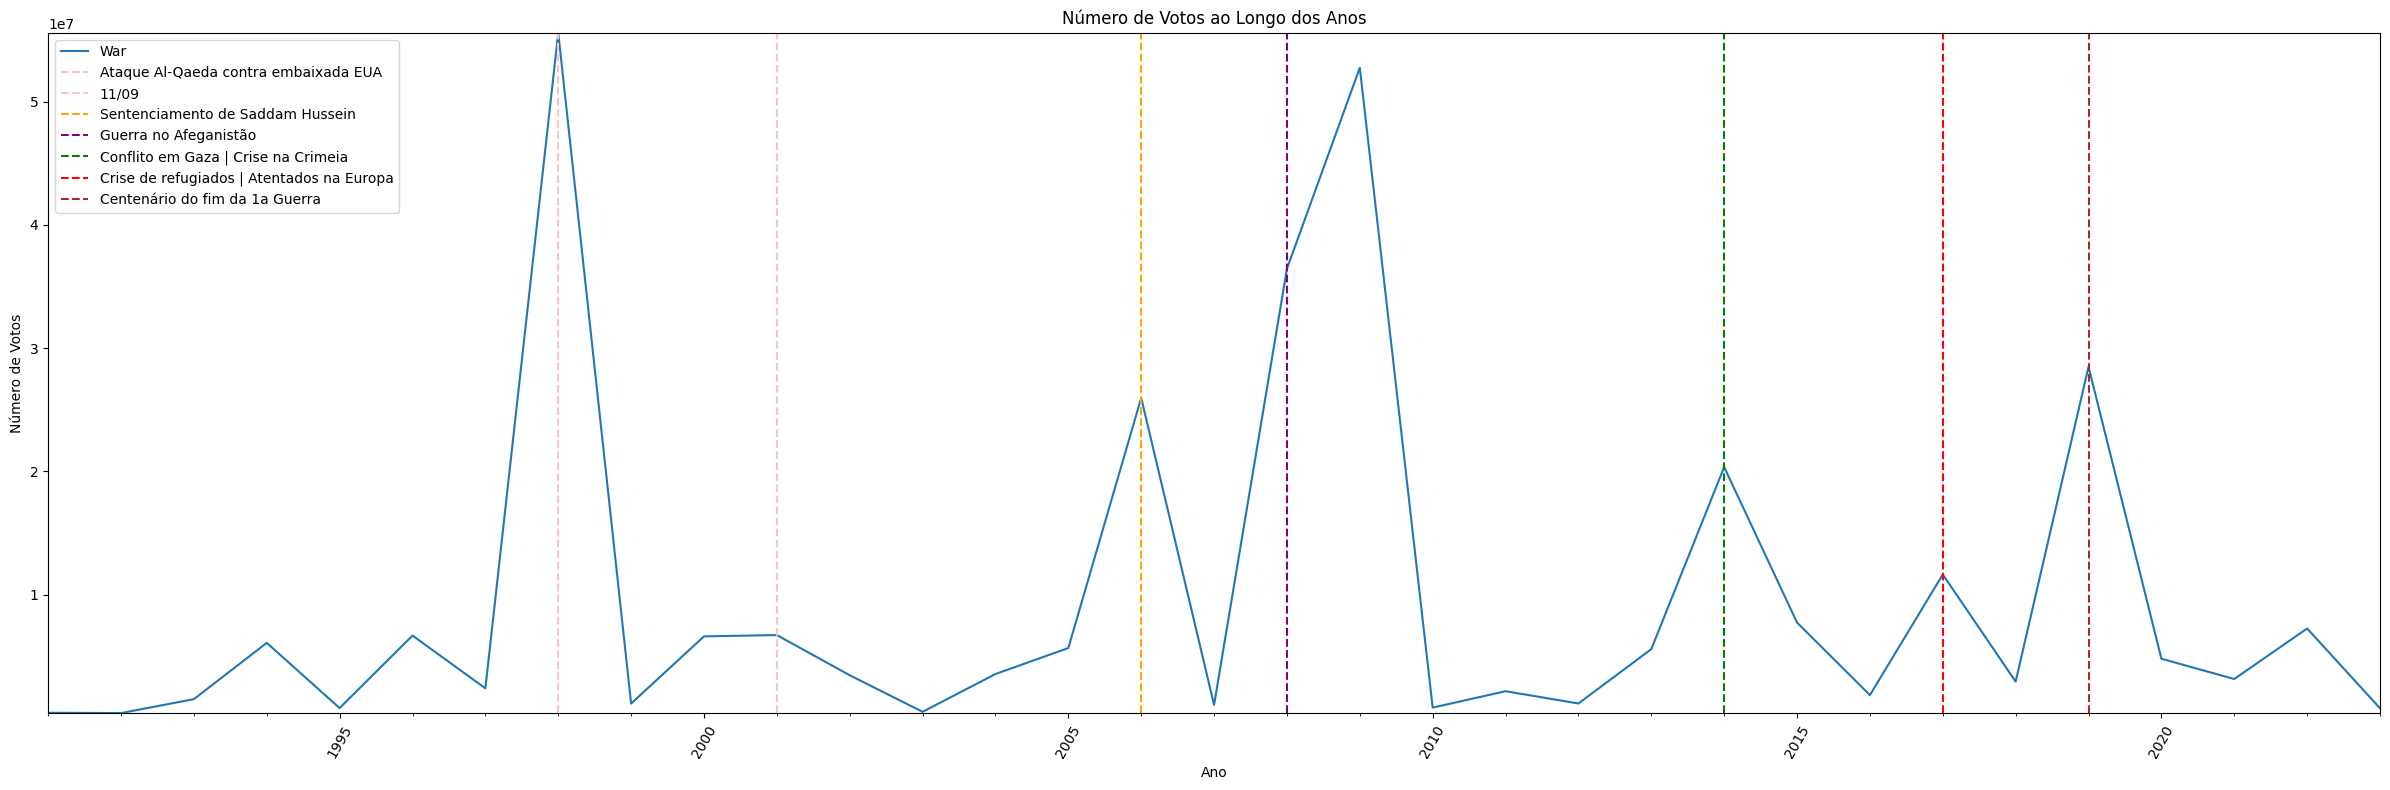

time: 1.69 s (started: 2023-06-06 10:58:51 +00:00)


In [ ]:

# Extrair os gêneros únicos
unique_genres = ['War']
# Criar uma figura vazia
fig, ax = plt.pyplot.subplots(figsize=(24,8))

# Para cada gênero, criar uma linha separada no gráfico
ymin = math.inf
ymax = 0
for genre in unique_genres:
    genre_df = ten[ten['genres'] == genre]
    genre_df.groupby('startYear_date')['numVotes'].sum().plot(ax=ax, label=genre)
    genre_df.groupby('startYear_date').size()
    ymin = ten[ten['genres'] == genre].groupby('startYear_date')['numVotes'].sum().min() if ten[ten['genres'] == genre].groupby('startYear_date')['numVotes'].sum().min() < ymin else ymin
    ymax = ten[ten['genres'] == genre].groupby('startYear_date')['numVotes'].sum().max() if ten[ten['genres'] == genre].groupby('startYear_date')['numVotes'].sum().max() > ymax else ymax

# Configurar os rótulos do gráfico
ax.set_xlabel('Ano')
ax.set_ylabel('Número de Votos')
ax.set_title('Número de Votos ao Longo dos Anos')
plt.pyplot.xticks(rotation=60)
ax.set_ylim([ymin, ymax])

# Linhar verticais
plt.pyplot.axvline(x=datetime.datetime(1998,1,1), label="Ataque Al-Qaeda contra embaixada EUA", color='pink', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2001,1,1), label="11/09", color='pink', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2006,1,1), label="Sentenciamento de Saddam Hussein", color='orange', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2008,1,1), label="Guerra no Afeganistão", color='purple', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2014,1,1), label="Conflito em Gaza | Crise na Crimeia", color='green', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2017,1,1), label="Crise de refugiados | Atentados na Europa", color='red', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2019,1,1), label="Centenário do fim da 1a Guerra", color='brown', linestyle='--')

ax.legend()

# Exibir o gráfico
plt.pyplot.tight_layout()
plt.pyplot.show()


##Explicação Para as Datas Escolhidas
**1998**: Ataque da Al-Qaeda em diversas embaixadas estadunidenses nos países africanos Nairobi, Kenya, Dar es Salaam e Tanzania. Causando um número de mortes de 224 pessoas e mais de 4500 feridos.

**2001**: O ataque terrorista suicida as torres gêmeas em Nova York pela organização Al-Qaeda causando um número de mortes de 2996 e mais de 6291 feridos.

**2006**: A divulgação da sentença de morte do antigo ditador iraquiano, pelos crimes cometidos pelo regime ditatorial que ele comandou durante 25 anos, entre 1979 e 2005. O ex-ditador foi considerado culpado do massacre, em 1982, de 148 xiitas no povoado de Dujail (sul do Iraque), onde sofrera uma suposta tentativa de assassinato.

**2008**: Em agosto de 2008, a situação piorou para a OTAN, já que suas baixas aumentaram sendo que junho, julho e agosto houve mais mortes que no Iraque, somando estes 3 meses são quase 120 mortos comparando isso com os 190 que morreram nos primeiros 3 anos o conflito é um claro sinal do ressurgimento da guerra.

**2014**: **Faixa de Gaza**: Israel iniciou uma ofensiva contra o Hamas. Aviões de guerra passaram a bombardear Gaza destruindo casas e instituições e foram realizadas execuções extrajudiciais. Os ataques israelenses causaram a morte de 1100 palestinos. <p>
**Crimeia**:  Aumenta a tensão entre Rússia e Ucrânia após o governo russo não reconhecer o novo governo ucraniano e enviar soldados a região da Crimeia alegando necessidade de proteger os russos que vivem no país e começam a sofrer ameaças de um governo mais nacionalista, EUA e União Europeia são contra a ação do governo russo.

**2017**: **Crise de Refugiados**: Em seu relatório anual Tendências Globais (ou Global Trends) o ACNUR (Agência da ONU para Refugiados) informa que 68,5 milhões de pessoas estavam deslocadas por guerras e conflitos até o final de 2017. Entre elas, 16,2 milhões se deslocaram em 2017 tanto pela primeira vez como repetidamente – o que corresponde a 44,5 mil pessoas sendo forçosamente deslocadas a cada dia (ou uma pessoa deslocada a cada dois segundos).<p>
**Atentados Terroristas na Europa**: 
Durante o ano de 2017, a Europa foi impactada por uma série de ataques terroristas perpetrados pelo Estado Islâmico. Esses atentados tiveram um efeito devastador não apenas em termos de perdas humanas e danos materiais, mas também deixaram marcas profundas nas sociedades europeias e em seu tecido social.

Os ataques terroristas de 2017 na Europa foram caracterizados por atos de violência indiscriminada, visando causar medo, desestabilizar as sociedades e propagar uma ideologia extremista. Diversas cidades europeias foram alvo desses atentados, que resultaram em perdas significativas de vidas humanas e ferimentos em um grande número de pessoas inocentes.

**2019**: O ano em questão marca um marco histórico significativo, pois comemoramos o centenário do fim da Primeira Guerra Mundial. Esse conflito, que ocorreu entre 1914 e 1919, deixou uma marca indelével na história da humanidade, com consequências profundas e duradouras.



##Analisando o gráfico
Podemos observar uma tendência interessante relacionada aos conflitos armados e eventos violentos marcantes. Fica evidente que nesses períodos ocorre um aumento significativo no número de votos e, consequentemente, um aumento no número de pessoas assistindo a filmes que abordam o gênero de guerra.

Essa observação sugere que as pessoas possam estar mais propensas a buscar filmes relacionados à temática de guerra durante momentos de conflito ou violência na realidade. É possível que isso ocorra devido a uma maior conscientização e interesse público em compreender os impactos e as experiências relacionadas à guerra.

O cinema tem sido historicamente um meio de reflexão e de expressão artística para explorar questões sociais e políticas. Durante períodos de conflito, os filmes de guerra podem fornecer uma maneira de processar e compreender os eventos que ocorrem ao redor do mundo, além de oferecer uma forma de entretenimento e escapismo para o público.

Além disso, o aumento no número de votos também pode ser influenciado pela criação de um senso de comunidade e de união em torno desses filmes. As pessoas podem sentir a necessidade de compartilhar suas opiniões e experiências por meio de votos e avaliações, buscando uma conexão com outros espectadores e fortalecendo o diálogo em torno dessas produções.

No entanto, é importante ressaltar que essas observações são baseadas em padrões gerais identificados no gráfico e podem variar de acordo com cada contexto específico de conflito armado ou evento violento. Para uma análise mais precisa e abrangente, é necessário considerar fatores adicionais, como o lançamento de filmes de guerra populares, campanhas de marketing, disponibilidade de mídia e outros fatores externos que possam influenciar o comportamento do público.

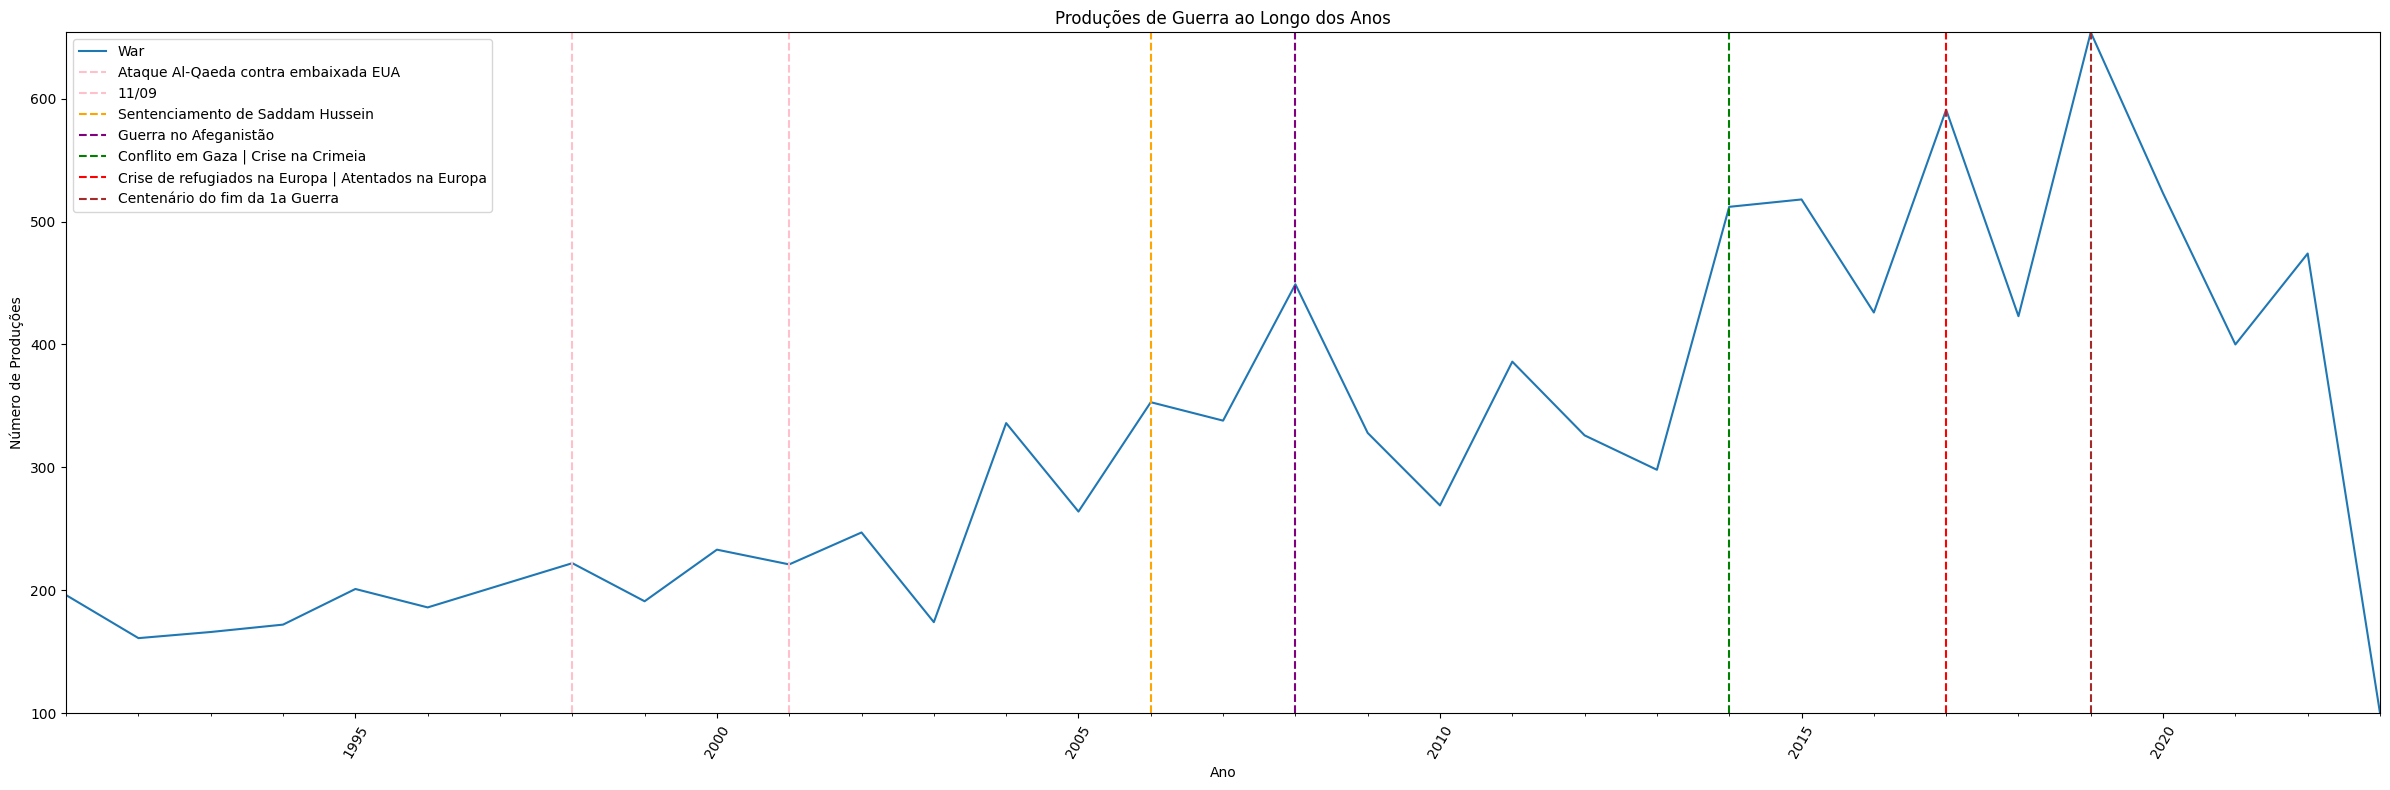

time: 1.91 s (started: 2023-06-06 10:58:53 +00:00)


In [ ]:
import datetime
# Olhar o numero de producoes de generos por ano para ver impacto de eventos históricos grandes (11/09, pandemia, guerra com ucrania, ChatGPT)
import math

# Extrair os gêneros únicos
unique_genres = ['War']
# Criar uma figura vazia
fig, ax = plt.pyplot.subplots(figsize=(24,8))

# Para cada gênero, criar uma linha separada no gráfico
ymin = math.inf
ymax = 0
for genre in unique_genres:
    genre_df = ten[ten['genres'] == genre]
    genre_df.groupby('startYear_date').size().plot(ax=ax, label=genre)
    genre_df.groupby('startYear_date').size()
    ymin = ten[ten['genres'] == genre].groupby(by='startYear_date')['titleId'].count().min() if ten[ten['genres'] == genre].groupby(by='startYear_date')['titleId'].count().min() < ymin else ymin
    ymax = ten[ten['genres'] == genre].groupby(by='startYear_date')['titleId'].count().max() if ten[ten['genres'] == genre].groupby(by='startYear_date')['titleId'].count().max() > ymax else ymax


# Configurar os rótulos do gráfico
ax.set_xlabel('Ano')
ax.set_ylabel('Número de Produções')
ax.set_title('Produções de Guerra ao Longo dos Anos')
plt.pyplot.xticks(rotation=60)
ax.set_ylim([ymin, ymax])



# Linhar verticais
plt.pyplot.axvline(x=datetime.datetime(1998,1,1), label="Ataque Al-Qaeda contra embaixada EUA", color='pink', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2001,1,1), label="11/09", color='pink', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2006,1,1), label="Sentenciamento de Saddam Hussein", color='orange', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2008,1,1), label="Guerra no Afeganistão", color='purple', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2014,1,1), label="Conflito em Gaza | Crise na Crimeia", color='green', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2017,1,1), label="Crise de refugiados na Europa | Atentados na Europa", color='red', linestyle='--')
plt.pyplot.axvline(x=datetime.datetime(2019,1,1), label="Centenário do fim da 1a Guerra", color='brown', linestyle='--')

ax.legend()

# Exibir o gráfico
plt.pyplot.tight_layout()
plt.pyplot.show()


#**Conclusão**

Em conclusão, os conflitos armados têm um impacto significativo no número de visualizações de filmes com gênero de guerra. Ao longo das últimas três décadas, observou-se um aumento nas visualizações desses filmes durante períodos de conflito ou eventos violentos marcantes.

Os conflitos armados despertam um interesse renovado do público por filmes de guerra, possivelmente devido ao desejo de compreender e explorar as realidades da guerra, seus efeitos emocionais e sociais. Nesses momentos, a temática da guerra ganha maior relevância e apelo, refletindo-se no aumento do número de votos e no aumento da audiência de filmes desse gênero.

No entanto, é importante ressaltar que essa relação não é linear e depende de diversos fatores, como a gravidade e a abrangência dos conflitos, a divulgação e a promoção dos filmes, além das preferências individuais dos espectadores. Além disso, outros gêneros cinematográficos também podem experimentar aumentos no número de visualizações durante períodos de conflito, pois o público busca diferentes formas de entretenimento e reflexão.

É fundamental reconhecer que o impacto dos conflitos armados no número de visualizações de filmes de guerra não deve ser encarado como uma celebração dos próprios conflitos, mas como um reflexo do interesse humano em compreender e explorar os aspectos complexos e muitas vezes trágicos da condição humana em tempos de guerra.

A indústria cinematográfica desempenha um papel importante ao abordar as questões relacionadas à guerra e ao conflito, oferecendo uma plataforma para contar histórias, criar empatia e estimular discussões críticas sobre os efeitos da guerra na sociedade e na vida das pessoas.

À medida que os conflitos armados continuam a afetar diversas regiões do mundo, é provável que o interesse por filmes de guerra permaneça presente, tanto como uma forma de entretenimento quanto como uma ferramenta para gerar conscientização e reflexão sobre os impactos desses conflitos.